In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_data = np.linspace(0, 10, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
b = 6

y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(x_data, columns=["X_Data"])

In [6]:
y_df = pd.DataFrame(y_true, columns=["Y"])

In [7]:
y_df.head()

,Y
0,5.572029
1,5.312062
2,6.091944
3,6.758623
4,3.817622


In [8]:
my_data = pd.concat([x_df, y_df], axis=1)

In [9]:
my_data.head()

,X_Data,Y
0,0.00000,5.572029
1,0.00001,5.312062
2,0.00002,6.091944
3,0.00003,6.758623
4,0.00004,3.817622


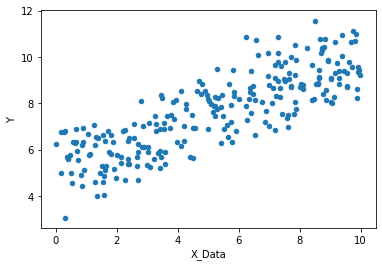

In [10]:
my_data.sample(250).plot(kind='scatter', x='X_Data', y='Y')

In [11]:
batch_size = 8

In [12]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [25]:
y_model = m * xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [28]:
init = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        sess.run(train, feed_dict={xph: x_data[rand_ind], yph:y_true[rand_ind]})
    
    model_m, model_b = sess.run([m, b])

In [30]:
print(model_m, model_b)

0.48221827 4.890183


In [31]:
y_hat = model_m * x_data + model_b

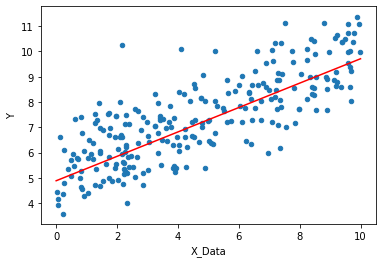

In [32]:
my_data.sample(250).plot(kind='scatter', x='X_Data', y='Y')
plt.plot(x_data, y_hat, 'r')

# tf.estimator API

In [138]:
feat_cols = tf.feature_column.numeric_column('x')

In [139]:
feat_cols = [tf.feature_column.numeric_column('x',shape=(1,))]

In [140]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmp4ldu3d3z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000216B4727148>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [143]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [144]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [145]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [149]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\USER\AppData\Local\Temp\tmp4ldu3d3z\model.ckpt.
INFO:tensorflow:loss = 474.35474, step = 0
INFO:tensorflow:global_step/sec: 879.717
INFO:tensorflow:loss = 15.168684, step = 100 (0.115 sec)
INFO:tensorflow:global_step/sec: 1165.9
INFO:tensorflow:loss = 26.45583, step = 200 (0.086 sec)
INFO:tensorflow:global_step/sec: 1193.65
INFO:tensorflow:loss = 18.199446, step = 300 (0.085 sec)
INFO:tensorflow:global_step/sec: 1152.51
INFO:tensorflow:loss = 9.990585, step = 400 (0.086 sec)
INFO:tensorflow:global_step/sec: 1179.63
INFO:tensorflow:loss = 27.406021, step = 500 (0.085 sec)
INFO:tensorflow:global_step/sec: 1165.9
INFO:tensorflow:loss = 8.864686, step = 600 (0.086 sec)
INFO:tensorflow:global_step/sec: 1

In [150]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-19T16:16:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp4ldu3d3z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-19-16:16:14
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1088085, global_step = 1000, label/mean = 7.5157065, loss = 8.870468, prediction/mean = 7.2292204
INFO:tensorflow:Saving 'checkpoint_path

In [151]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-19T16:16:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp4ldu3d3z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-19-16:16:18
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1225163, global_step = 1000, label/mean = 7.496147, loss = 8.98013, prediction/mean = 7.208836
INFO:tensorflow:Saving 'checkpoint_path' s

In [152]:
train_metrics

{'average_loss': 1.1088085,
 'label/mean': 7.5157065,
 'loss': 8.870468,
 'prediction/mean': 7.2292204,
 'global_step': 1000}

In [153]:
eval_metrics

{'average_loss': 1.1225163,
 'label/mean': 7.496147,
 'loss': 8.98013,
 'prediction/mean': 7.208836,
 'global_step': 1000}

In [154]:
brand_new_data = np.linspace(0, 10, 10)

In [155]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [156]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp4ldu3d3z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4062977], dtype=float32)},
 {'predictions': array([5.0333323], dtype=float32)},
 {'predictions': array([5.6603665], dtype=float32)},
 {'predictions': array([6.287401], dtype=float32)},
 {'predictions': array([6.9144354], dtype=float32)},
 {'predictions': array([7.5414696], dtype=float32)},
 {'predictions': array([8.168505], dtype=float32)},
 {'predictions': array([8.795539], dtype=float32)},
 {'predictions': array([9.422573], dtype=float32)},
 {'predictions': array([10.049608], dtype=float32)}]

In [157]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp4ldu3d3z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [158]:
predictions

[array([4.4062977], dtype=float32),
 array([5.0333323], dtype=float32),
 array([5.6603665], dtype=float32),
 array([6.287401], dtype=float32),
 array([6.9144354], dtype=float32),
 array([7.5414696], dtype=float32),
 array([8.168505], dtype=float32),
 array([8.795539], dtype=float32),
 array([9.422573], dtype=float32),
 array([10.049608], dtype=float32)]

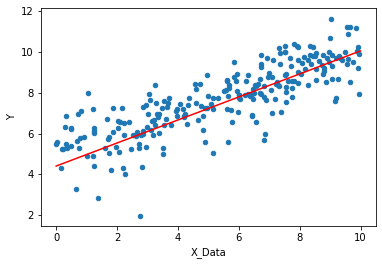

In [159]:
my_data.sample(n=250).plot(kind='scatter', x='X_Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')